## Notebook 2.2 Data Understanding and Preprocessing of Support Tables

For all intents and purposes, this should be considered as the second real notebook that is part of the thesis work. In it, we will look at the support tables that are part of the original database. These tables have information concerning courses and student performance - meaningful features for our project.

#### 1. We are familiarized with the logs

Before going further, we should assess the remaining tables presented in the database. 

Recall, **logs record interactions with the system and we are looking for ways to determine whether these interactions can assist educators identify at risk students and high performing students.**

Thus, to make the best out of the logs, we will need to perform different segmentations and it is likely that we will need perform some filtering. 

### To do that, we will take a look at all tables

We will look at all tables and all columns to make a preliminary assessment of the utility of the available elements.
In general, these are support elements that will be used sparsely, as most of the relevant information is present in the logs.

The observation of each table will resort to the same chain of commands:

info -> to observe count and datatype of each column, 
describe -> a command that that returns the most notable descriptive statistics of each column.
The obeservation of each table ends with a look at the raw data (At least the visible rows).

#### 2. We'll start this notebook by importing all relevant packages and data

All data is stored in the csv files that were exported in the previous notebook. 

In order to minimize unecessary steps, as we import these csv files we will immediatly remove, from each dataset:
1. The first unnamed column,
2. All columns that are entirely made of missing values - we have detected some.
3. All numerical columns that are immediatly recognied as categorical (or likely to be categorical values) are also immediatly declared as categoricals - this does not mean that, upon further assessment, other features may be converted to objects,
4. All features that display no null values and have a single value are promptly removed as well, 
5. Features related to time are converted to appropriate format - this is ultimately an ad-hoc assessment, but an important one to make.

In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
#other tables with support information
context_table = pd.read_csv('../Data/R_Gonz_data_mdl_context.csv', #context table -> unclear utility
                           dtype = {
                                   'id': object,
                                   'contextlevel': object,
                                   'instanceid': object,
                                   'path': object,
                                   'depth': object,                       
                                   },).drop('Unnamed: 0', axis = 1).dropna(how = 'all', axis = 1)

course_table = pd.read_csv('../Data/R_Gonz_data_mdl_course.csv', #course table -> unclear utility
                           dtype = {
                                   'category': object,
                                   'outcomeid': object,
                                   'summaryformat': object,
                                   'showgrades': object,
                                   'newsitems': object,
                                   'legacyfiles': object,
                                   'marker': object,
                                   'showreports': object,          
                                   'visible': object,
                                   'visibleold': object,
                                   'groupmode': object,
                                   'groupmodeforce': object,
                                   'defaultgroupingid': object,
                                   'lang': object,          
                                   'requested': object,
                                   'enablecompletion': object,
                                   'completionnotify': object,                              
                                   },).drop('Unnamed: 0', axis = 1).dropna(how = 'all', axis = 1) 

course_mod_table = pd.read_csv('../Data/R_Gonz_data_mdl_course_modules.csv', #course module table -> unclear utility
                           dtype = {
                                   'id': object,
                                   'module': object,
                                   'instance': object,
                                   'course': object,
                                   'section': object,
                                   'idnumber': object,
                                   'indent': object,
                                   'visible': object,
                                   'visibleold': object,
                                   'groupmode': object,
                                   'groupingin': object,
                                   'groupmembersonly': object,
                                   'visibleold': object,
                                   'groupmode': object,
                                   'groupingin': object,
                                   'groupmembersonly': object,
                                   'completion': object,
                                   'completionview': object,
                                   'showavailability': object,
                                   'showdescription': object,
                                   },).drop('Unnamed: 0', axis = 1).dropna(how = 'all', axis = 1) 

grades_table = pd.read_csv('../Data/R_Gonz_data_mdl_grade_grades.csv',  # grade table -> unclear utility
                           dtype = {
                                   'id': object,
                                   'itemid': object,
                                   'userid': object,
                                   'usermodified': object,
                                   'rawscaleid': object,
                                    'hidden': object,
                                   'feedback': object,
                                   'userid': object,
                                   'feedbackformat': object,
                                   'informationformat': object, 
                                   },).drop('Unnamed: 0', axis = 1).dropna(how = 'all', axis = 1)

grade_item_table = pd.read_csv('../Data/R_Gonz_data_mdl_grade_items.csv', # grade_items table -> unclear utility
                           dtype = {
                                   'id': object,
                                   'itemid': object,
                                   'categoryid': object,
                                   'courseid': object,
                                   'idnumber': object,
                                   'itemnumber' : object,
                                   'gradetype': object,
                                   'scaleid': object,
                                   'multfactor': object,
                                   'outcomeid': object,                          
                                   },).drop('Unnamed: 0', axis = 1).dropna(how = 'all', axis = 1) 

role_assign_table = pd.read_csv('../Data/R_Gonz_data_mdl_role_assignments.csv', # role assignments table -> unclear utility
                           dtype = {
                                   'id': object,
                                   'roleid': object,
                                   'contextid': object,
                                   'itemid': object,
                                   'userid': object,
                                   'modifierid': object,
                                   },).drop('Unnamed: 0', axis = 1).dropna(how = 'all', axis = 1)

#### First, the role assignment tables

The role assignment table is the table where the user assignments of the database are present.
With it, we can see which roles exist and, ultimately, filter for their role - which is represented in this table by the column roleid.

In [3]:
role_assign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219297 entries, 0 to 219296
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            219297 non-null  object 
 1   roleid        219297 non-null  object 
 2   contextid     219297 non-null  object 
 3   userid        219297 non-null  object 
 4   timemodified  219297 non-null  float64
 5   modifierid    219297 non-null  object 
 6   component     194425 non-null  object 
 7   itemid        219297 non-null  object 
 8   sortorder     219297 non-null  float64
dtypes: float64(2), object(7)
memory usage: 15.1+ MB


In [4]:
role_assign_table.drop([
                    'sortorder',
                    ],
                    axis = 1, inplace = True)

#timemodifieds seem to be a time feature, so we will appropriately make the conversion to datetime
role_assign_table['timemodified'] = pd.to_datetime(role_assign_table['timemodified'], unit = 's', errors = 'coerce')

We see that this database has 30813 unique users and 3 unique roles. As the data that is part of this database deals with information collected throughout one school-year, it is likely that the most represented role is the role of student.

we will find the most common value in the role in role id and filter the role assignment table, only keeping rows where that role is present. 

In [5]:
#get most common role and filter approppriately
student_role = list(role_assign_table['roleid'].mode())

#we will create 2 dataframes - one with the students and another with other members
other_roles_tables = role_assign_table[~(role_assign_table['roleid'].isin(student_role))]
role_assign_table = role_assign_table[role_assign_table['roleid'].isin(student_role)]

#we will also create a list will all users whose role is student
students = role_assign_table['userid'].unique()

In [6]:
role_assign_table.describe(include = 'all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
id,208550,208550,2.0,1,NaT,NaT,NaT,NaT,NaT,NaT
roleid,208550,1,5.0,208550,NaT,NaT,NaT,NaT,NaT,NaT
contextid,208550,4215,229861.0,24826,NaT,NaT,NaT,NaT,NaT,NaT
userid,208550,29062,38881.0,33,NaT,NaT,NaT,NaT,NaT,NaT
timemodified,208550,NaN,NaN,NaN,2014-09-21 10:15:55.523346944,2014-07-01 11:13:21,2014-08-05 22:34:00,2014-09-03 03:15:18,2014-10-15 18:15:47.750000128,2015-07-30 23:41:19
modifierid,208550,27,0.0,208416,NaT,NaT,NaT,NaT,NaT,NaT
component,183687,1,enrol_database,183687,NaT,NaT,NaT,NaT,NaT,NaT
itemid,208550,4208,0.0,24863,NaT,NaT,NaT,NaT,NaT,NaT


In [7]:
#use this cell to write any additional piece of code that may be required

**Next, we'll consider grades**

Student performance is, in general, measured by the student's grade. So... how do we measure grades?
As all we have is data from Moodle, it is important that we can either find or calculate the targets from Moodle data.

So, in an immediate fashion, we'll have to identify which courses have graded assignments and slice a course list for those.
we can deal with calculating our target at a later stage.

In [8]:
grades_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437650 entries, 0 to 437649
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 437650 non-null  object 
 1   itemid             437650 non-null  object 
 2   userid             437650 non-null  object 
 3   rawgrade           137820 non-null  float64
 4   rawgrademax        437650 non-null  float64
 5   rawgrademin        437650 non-null  float64
 6   rawscaleid         88518 non-null   object 
 7   usermodified       437650 non-null  object 
 8   finalgrade         236668 non-null  float64
 9   hidden             437650 non-null  object 
 10  locked             437650 non-null  float64
 11  locktime           437650 non-null  float64
 12  exported           437650 non-null  float64
 13  overridden         437650 non-null  float64
 14  excluded           437650 non-null  float64
 15  feedback           20273 non-null   object 
 16  fe

In [9]:
#the informationformat feature has no null values and is a single value feature, so we remove it
grades_table.drop('informationformat', axis = 1, inplace = True)

#time created and timemodified seem to be time features, so we will appropriately make the conversion to datetime
grades_table['timecreated'] = pd.to_datetime(grades_table['timecreated'], unit = 's', errors = 'coerce')
grades_table['timemodified'] = pd.to_datetime(grades_table['timemodified'], unit = 's', errors = 'coerce')

#experimental - to delete if need be - only keeping students
grades_table = grades_table[grades_table['userid'].isin(students)]

In [10]:
grades_table.describe(include ='all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,436576,436576,160262.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemid,436576,12449,12096.0,669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userid,436576,17847,71424.0,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rawgrade,137747.0,NaN,NaN,NaN,49.95053,-11.73913,4.79899,10.0,60.0,1001.0,120.249099
rawgrademax,436576.0,NaN,NaN,NaN,88.604383,0.0,10.0,100.0,100.0,1001.0,179.80363
rawgrademin,436576.0,NaN,NaN,NaN,0.207278,-1.0,0.0,0.0,0.0,5.0,0.409931
rawscaleid,88426,186,4.0,32572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usermodified,436576,15316,0.0,62082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finalgrade,236432.0,NaN,NaN,NaN,43.932876,0.0,2.5,8.07,51.0,1140.8,112.841518
hidden,436576,2,0.0,416015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
grades_table

,id,itemid,userid,rawgrade,rawgrademax,rawgrademin,rawscaleid,usermodified,finalgrade,hidden,locked,locktime,exported,overridden,excluded,feedback,feedbackformat,timecreated,timemodified
25,160262.0,24765.0,4.0,NaN,100.0,0.0,NaN,69457.0,0.25000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-01-13 11:35:05
26,186592.0,24769.0,4.0,2.0,2.0,0.0,NaN,4.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-02-10 10:45:00,2015-02-10 10:45:00
27,216725.0,24770.0,4.0,NaN,100.0,0.0,NaN,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2015-02-24 12:00:51,1970-01-01 00:00:00
28,216721.0,24771.0,4.0,NaN,100.0,0.0,NaN,69457.0,5.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-01-13 11:34:44
29,4.0,24866.0,4.0,NaN,100.0,0.0,NaN,3.0,52.02941,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-06-01 08:18:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437645,458230.0,34921.0,78663.0,NaN,100.0,0.0,NaN,0.0,4.16667,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,1970-01-01 00:00:00
437646,458229.0,34922.0,78663.0,2.5,60.0,0.0,NaN,78663.0,2.50000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-26 19:33:35,2015-07-26 19:33:35
437647,458257.0,34921.0,81739.0,NaN,100.0,0.0,NaN,0.0,56.37500,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,1970-01-01 00:00:00
437648,458256.0,34922.0,81739.0,40.2,60.0,0.0,NaN,81739.0,40.20000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-28 09:15:21,2015-07-28 09:15:22


array([[<AxesSubplot:title={'center':'rawgrade'}>,
        <AxesSubplot:title={'center':'rawgrademax'}>,
        <AxesSubplot:title={'center':'rawgrademin'}>],
       [<AxesSubplot:title={'center':'finalgrade'}>,
        <AxesSubplot:title={'center':'locked'}>,
        <AxesSubplot:title={'center':'locktime'}>],
       [<AxesSubplot:title={'center':'exported'}>,
        <AxesSubplot:title={'center':'overridden'}>,
        <AxesSubplot:title={'center':'excluded'}>],
       [<AxesSubplot:title={'center':'timecreated'}>,
        <AxesSubplot:title={'center':'timemodified'}>, <AxesSubplot:>]],
      dtype=object)

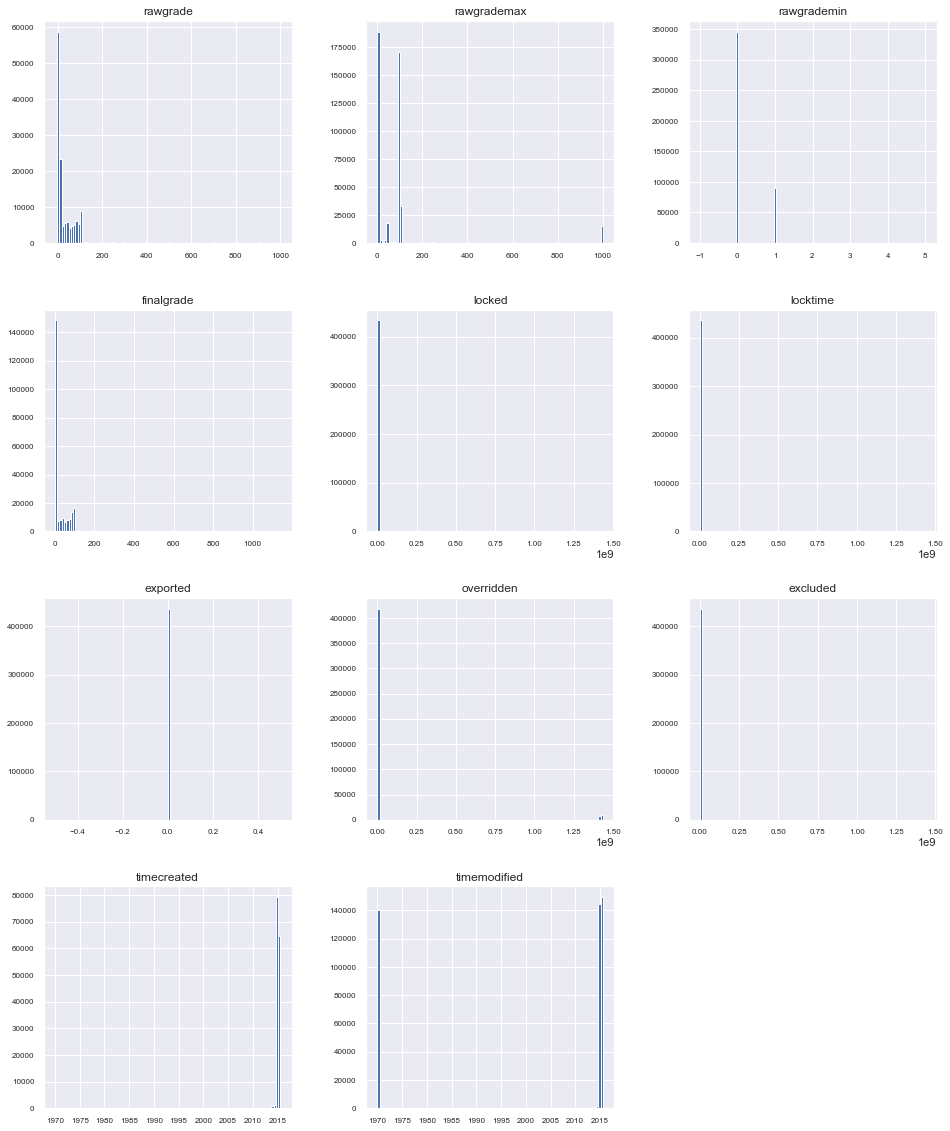

In [12]:
#Plot the distributions of each feature to check whther to split by categorical or continuous
grades_table.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

In [13]:
#use this cell to write any additional piece of code that may be required

This section is experimental in order to identify the courses that have graded assignments

In [14]:
#let me check - the authors mentioned that they knew final grades of 30 course

sample = grades_table.dropna(subset = ['rawgrademax'])
sample

,id,itemid,userid,rawgrade,rawgrademax,rawgrademin,rawscaleid,usermodified,finalgrade,hidden,locked,locktime,exported,overridden,excluded,feedback,feedbackformat,timecreated,timemodified
25,160262.0,24765.0,4.0,NaN,100.0,0.0,NaN,69457.0,0.25000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-01-13 11:35:05
26,186592.0,24769.0,4.0,2.0,2.0,0.0,NaN,4.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-02-10 10:45:00,2015-02-10 10:45:00
27,216725.0,24770.0,4.0,NaN,100.0,0.0,NaN,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2015-02-24 12:00:51,1970-01-01 00:00:00
28,216721.0,24771.0,4.0,NaN,100.0,0.0,NaN,69457.0,5.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-01-13 11:34:44
29,4.0,24866.0,4.0,NaN,100.0,0.0,NaN,3.0,52.02941,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-06-01 08:18:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437645,458230.0,34921.0,78663.0,NaN,100.0,0.0,NaN,0.0,4.16667,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,1970-01-01 00:00:00
437646,458229.0,34922.0,78663.0,2.5,60.0,0.0,NaN,78663.0,2.50000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-26 19:33:35,2015-07-26 19:33:35
437647,458257.0,34921.0,81739.0,NaN,100.0,0.0,NaN,0.0,56.37500,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,1970-01-01 00:00:00
437648,458256.0,34922.0,81739.0,40.2,60.0,0.0,NaN,81739.0,40.20000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-28 09:15:21,2015-07-28 09:15:22


array([[<AxesSubplot:title={'center':'rawgrade'}>,
        <AxesSubplot:title={'center':'rawgrademax'}>,
        <AxesSubplot:title={'center':'rawgrademin'}>],
       [<AxesSubplot:title={'center':'finalgrade'}>,
        <AxesSubplot:title={'center':'locked'}>,
        <AxesSubplot:title={'center':'locktime'}>],
       [<AxesSubplot:title={'center':'exported'}>,
        <AxesSubplot:title={'center':'overridden'}>,
        <AxesSubplot:title={'center':'excluded'}>],
       [<AxesSubplot:title={'center':'timecreated'}>,
        <AxesSubplot:title={'center':'timemodified'}>, <AxesSubplot:>]],
      dtype=object)

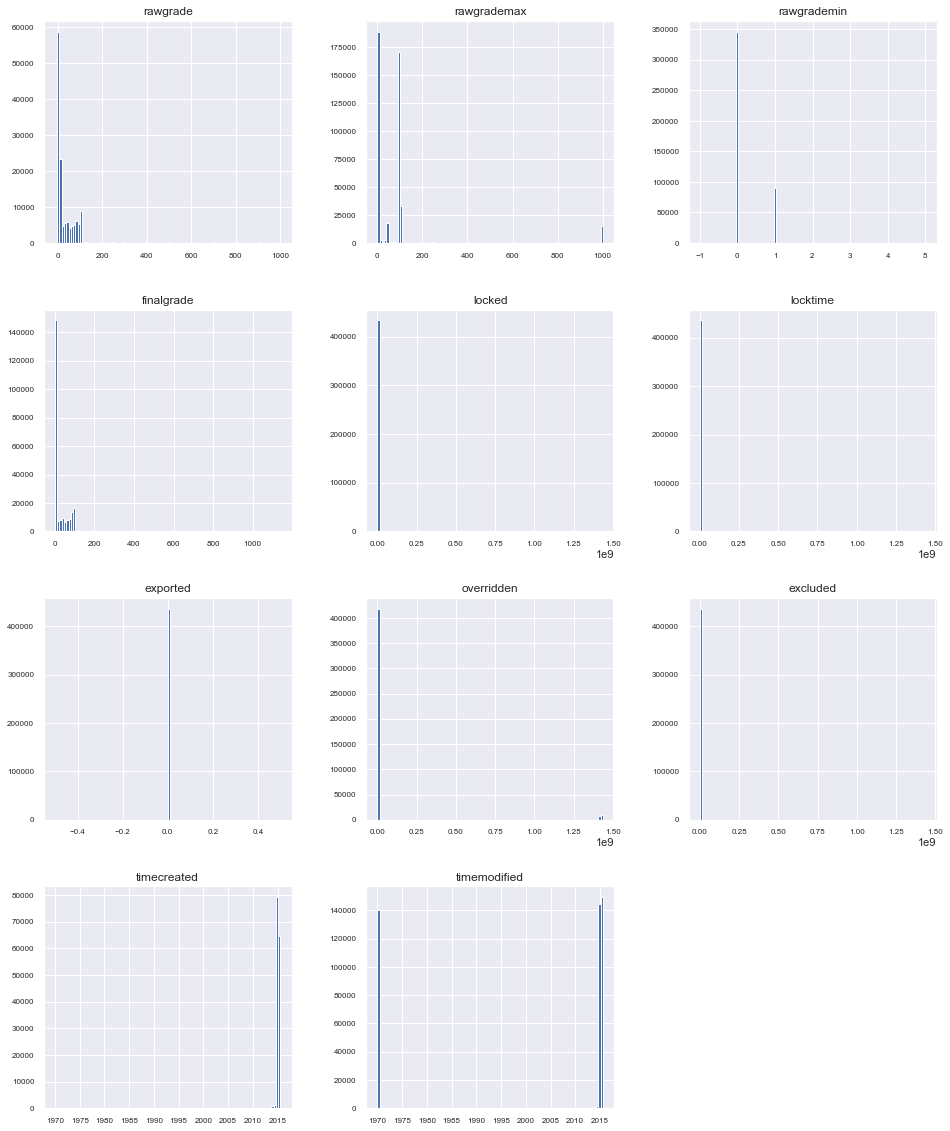

In [15]:
#Plot the distributions of each feature to check whther to split by categorical or continuous
sample.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

In [16]:
sample.describe(include = 'all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,436576,436576,160262.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemid,436576,12449,12096.0,669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userid,436576,17847,71424.0,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rawgrade,137747.0,NaN,NaN,NaN,49.95053,-11.73913,4.79899,10.0,60.0,1001.0,120.249099
rawgrademax,436576.0,NaN,NaN,NaN,88.604383,0.0,10.0,100.0,100.0,1001.0,179.80363
rawgrademin,436576.0,NaN,NaN,NaN,0.207278,-1.0,0.0,0.0,0.0,5.0,0.409931
rawscaleid,88426,186,4.0,32572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usermodified,436576,15316,0.0,62082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finalgrade,236432.0,NaN,NaN,NaN,43.932876,0.0,2.5,8.07,51.0,1140.8,112.841518
hidden,436576,2,0.0,416015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
grade_item_table

,id,courseid,categoryid,itemname,itemtype,itemmodule,iteminstance,itemnumber,idnumber,calculation,...,aggregationcoef,sortorder,display,decimals,hidden,locked,locktime,needsupdate,timecreated,timemodified
0,1.0,3.0,NaN,nombre,course,NaN,1.0,NaN,NaN,NaN,...,0.0,69.0,0.0,NaN,0.0,0.0,0.0,0.0,1.217234e+09,1.307371e+09
1,2.0,3.0,1.0,nombre,mod,assign,1.0,0.0,NaN,NaN,...,0.0,71.0,0.0,NaN,0.0,0.0,0.0,0.0,1.402312e+09,1.402312e+09
2,3.0,3.0,1.0,nombre,mod,assign,2.0,0.0,NaN,NaN,...,0.0,70.0,0.0,NaN,0.0,0.0,0.0,0.0,1.402312e+09,1.402312e+09
3,4.0,4.0,NaN,nombre,course,NaN,2.0,NaN,NaN,NaN,...,0.0,15.0,0.0,NaN,0.0,0.0,0.0,0.0,1.318326e+09,1.318326e+09
4,5.0,5.0,NaN,nombre,course,NaN,3.0,NaN,NaN,NaN,...,0.0,3989.0,0.0,NaN,0.0,0.0,0.0,0.0,1.247053e+09,1.409821e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,35022.0,4182.0,4932.0,nombre,mod,assign,18870.0,0.0,NaN,NaN,...,0.0,83.0,0.0,NaN,0.0,0.0,0.0,0.0,1.437034e+09,1.437034e+09
30024,35023.0,4182.0,4932.0,nombre,mod,assign,18871.0,0.0,NaN,NaN,...,0.0,86.0,0.0,NaN,0.0,0.0,0.0,0.0,1.437034e+09,1.437034e+09
30025,35025.0,4182.0,4932.0,nombre,mod,assign,18873.0,0.0,NaN,NaN,...,0.0,66.0,0.0,NaN,0.0,0.0,0.0,0.0,1.437035e+09,1.437035e+09
30026,35026.0,3022.0,3646.0,nombre,mod,assign,18874.0,0.0,NaN,NaN,...,0.0,277.0,0.0,NaN,0.0,0.0,0.0,0.0,1.437096e+09,1.437099e+09


### End of experimental area

**Next, we have the Grade_item_table**

The grade_item table stores information concerning every gradeable item present in the database.

In [18]:
grade_item_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30028 entries, 0 to 30027
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30028 non-null  object 
 1   courseid         30028 non-null  object 
 2   categoryid       23322 non-null  object 
 3   itemname         30028 non-null  object 
 4   itemtype         30028 non-null  object 
 5   itemmodule       21372 non-null  object 
 6   iteminstance     30028 non-null  float64
 7   itemnumber       23322 non-null  object 
 8   idnumber         3454 non-null   object 
 9   calculation      424 non-null    object 
 10  gradetype        30028 non-null  object 
 11  grademax         30028 non-null  float64
 12  grademin         30028 non-null  float64
 13  scaleid          4768 non-null   object 
 14  outcomeid        25260 non-null  object 
 15  gradepass        30028 non-null  float64
 16  multfactor       30028 non-null  object 
 17  plusfactor  

In [19]:
grade_item_table['gradetype'].value_counts()

1.0    23935
2.0     4783
3.0     1205
0.0      105
Name: gradetype, dtype: int64

In [20]:
#the informationformat feature has no null values and is a single value feature, so we remove it
grade_item_table.drop([
                    'itemname',
                    'plusfactor',
                    ],
                    axis = 1, inplace = True)

#time created and timemodified seem to be time features, so we will appropriately make the conversion to datetime
grade_item_table['timecreated'] = pd.to_datetime(grade_item_table['timecreated'], unit = 's', errors = 'coerce')
grade_item_table['timemodified'] = pd.to_datetime(grade_item_table['timemodified'], unit = 's', errors = 'coerce') 

In [21]:
grade_item_table.describe(include ='all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,30028,30028,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
courseid,30028,5551,1073.0,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categoryid,23322,3363,1191.0,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemtype,30028,4,mod,21372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemmodule,21372,11,assign,15773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iteminstance,30028.0,NaN,NaN,NaN,6295.270248,0.0,1728.0,4601.5,10341.25,18875.0,5529.99404
itemnumber,23322,1,0.0,23322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idnumber,3454,2691,1,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculation,424,419,=101+102,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gradetype,30028,4,1.0,23935,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
grade_item_table['itemmodule'].value_counts()

assign           15773
quiz              4517
forum              264
scorm              237
questionnaire      214
workshop           195
glossary            91
lesson              47
nanogong            21
data                12
pcast                1
Name: itemmodule, dtype: int64

In [23]:
#use this cell to write any additional piece of code that may be required

All we have is the 699 courses reference point - it should be possible for us, using this table, to reach the courses used in the reference. We do not have enough information to know, for sure, which is the correct mode used by the authors of the Riestra Gonzalez paper.

WE will perform multiple attempts of filtering the dataset until we reach the correct.

#### Attempt #1: Filtering by Idnumber anshould only return instances of graded items - 731 courses

In [24]:
#this filtering technique, by itself, does not yield the intended result
attempt_1 = grade_item_table[grade_item_table['idnumber'].notnull()]
attempt_1.describe(include= 'all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,3454,3454,78.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
courseid,3454,731,4432.0,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categoryid,3142,839,406.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemtype,3454,4,mod,2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemmodule,2471,8,assign,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iteminstance,3454.0,NaN,NaN,NaN,5135.86161,0.0,567.25,3791.5,9131.25,18771.0,4771.363461
itemnumber,3142,1,0.0,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idnumber,3454,2691,1,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculation,227,226,=##gi10499##+##gi10500##+(8-##gi10499##-##gi10...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gradetype,3454,4,1.0,2523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### It is possible to see that only a subset of courses has graded items.

As performed by the authors of the Riestra-Gonzalez paper, we will only look to work with courses that have graded assignments. 
The reason for this option is straightforward - we have no access to the SIS, which means that our target will be, in some shape or form, related to the graded assignments.

**After looking at the grades tables, it is important to incorporate the information presented in these tables with the tables about courses**.

For that, we have access to multiple dfs related to the courses themselves.
Behold, the course_table.

In [25]:
course_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5732 non-null   float64
 1   category           5732 non-null   object 
 2   sortorder          5732 non-null   float64
 3   fullname           5732 non-null   object 
 4   shortname          5732 non-null   object 
 5   idnumber           5731 non-null   object 
 6   summary            5732 non-null   object 
 7   summaryformat      5732 non-null   object 
 8   format             5732 non-null   object 
 9   showgrades         5732 non-null   object 
 10  newsitems          5732 non-null   object 
 11  startdate          5732 non-null   float64
 12  marker             5732 non-null   object 
 13  maxbytes           5732 non-null   float64
 14  legacyfiles        5732 non-null   object 
 15  showreports        5732 non-null   object 
 16  visible            5732 

In [26]:
course_table.describe(include ='all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5732.0,NaN,NaN,NaN,2930.081124,1702.553233,1.0,1452.75,2928.5,4387.25,5932.0
category,5732,74,1.0,3589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sortorder,5732.0,NaN,NaN,NaN,213321.98866,313262.684429,1.0,11432.75,12865.5,380005.25,850116.0
fullname,5732,1,nombre,5732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shortname,5732,5732,Uniovi Virtual,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idnumber,5731,5731,"T_1C,A_15473",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summary,5732,1,-,5732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summaryformat,5732,3,1.0,3316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
format,5732,5,topics,5710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
showgrades,5732,2,1.0,5228,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#the course_table has multiple single value feature with no nans, as with the previous considered features, we will remove them

course_table.drop(['fullname',
                       'summary',
                       'requested',
                       'enablecompletion',
                       'completionnotify'],
                       axis = 1, inplace = True)

#time created and timemodified seem to be time features, so we will appropriately make the conversion to datetime
course_table['startdate'] = pd.to_datetime(course_table['startdate'], unit = 's', errors = 'coerce')
course_table['timecreated'] = pd.to_datetime(course_table['timecreated'], unit = 's', errors = 'coerce')
course_table['timemodified'] = pd.to_datetime(course_table['timemodified'], unit = 's', errors = 'coerce')
course_table['cacherev'] = pd.to_datetime(course_table['cacherev'], unit = 's', errors = 'coerce') 

In [28]:
course_table

,id,category,sortorder,shortname,idnumber,summaryformat,format,showgrades,newsitems,startdate,...,showreports,visible,visibleold,groupmode,groupmodeforce,defaultgroupingid,lang,timecreated,timemodified,cacherev
0,1.0,0.0,1.0,Uniovi Virtual,NaN,0.0,site,1.0,3.0,1970-01-01 00:00:00,...,0.0,1.0,1.0,0.0,0.0,0.0,NaN,2014-06-05 17:08:12,2014-08-25 13:13:00,2015-06-03 12:11:01
1,3.0,1.0,13589.0,"T_1C,A_15473","T_1C,A_15473",1.0,topics,1.0,1.0,1999-11-29 23:00:00,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,2011-06-06 14:32:36,2011-09-12 12:25:12,2015-03-02 16:33:13
2,4.0,1.0,13588.0,"T_1C,A_15470","T_1C,A_15470",1.0,topics,1.0,1.0,2012-10-02 22:00:00,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,2011-09-26 09:11:45,2012-10-03 01:45:30,2015-03-02 16:33:13
3,5.0,1.0,13587.0,"T_1C,A_15181","T_1C,A_15181",1.0,topics,1.0,1.0,2014-01-21 23:00:00,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,2011-06-06 14:32:51,2014-01-22 18:42:58,2015-03-02 16:33:13
4,6.0,61.0,310007.0,"T_S,A_MGENYDIV-1-022","T_S,A_MGENYDIV-1-022",1.0,topics,1.0,1.0,2015-01-31 23:00:00,...,0.0,1.0,1.0,0.0,0.0,0.0,NaN,2011-06-20 10:49:05,2015-02-01 21:32:00,2015-03-02 16:33:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,5928.0,108.0,790005.0,"T_CL,P_10119,A_6634","T_CL,P_10119,A_6634",0.0,topics,1.0,5.0,1970-01-01 00:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01 09:17:43,2015-07-01 09:17:43,2015-07-01 09:17:43
5728,5929.0,108.0,790004.0,"T_CL,P_10119,A_6635","T_CL,P_10119,A_6635",0.0,topics,1.0,5.0,1970-01-01 00:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01 09:17:44,2015-07-01 09:17:44,2015-07-06 12:39:03
5729,5930.0,108.0,790003.0,"T_CL,P_10119,A_6624","T_CL,P_10119,A_6624",0.0,topics,1.0,5.0,1970-01-01 00:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01 09:17:44,2015-07-01 09:17:44,2015-07-01 09:17:44
5730,5931.0,108.0,790002.0,"T_CL,P_10119,A_6625","T_CL,P_10119,A_6625",0.0,topics,1.0,5.0,1970-01-01 00:00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2015-07-01 09:17:45,2015-07-01 09:17:45,2015-07-06 12:39:02


In [29]:
#use this cell to write any additional piece of code that may be required

#### The course module table is present in other datasets "e.g. The Open Moodle Dataset", 

According to it, the course module table describes every activity performed with Moodle. In our case, it records every activity performed in every course.

Here follows a brief overview of this table.

In [30]:
course_mod_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228216 entries, 0 to 228215
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  228216 non-null  object 
 1   course              228216 non-null  object 
 2   module              228216 non-null  object 
 3   instance            228216 non-null  object 
 4   section             228216 non-null  object 
 5   idnumber            428 non-null     object 
 6   added               228216 non-null  float64
 7   score               228216 non-null  float64
 8   indent              228216 non-null  object 
 9   visible             228216 non-null  object 
 10  visibleold          228216 non-null  object 
 11  groupmode           228216 non-null  object 
 12  groupingid          228216 non-null  float64
 13  groupmembersonly    228216 non-null  object 
 14  completion          228216 non-null  object 
 15  completionview      228216 non-nul

In [31]:
#the course_table has multiple single value feature with no nans, as with the previous considered features, we will remove them

course_mod_table.drop([
                    'groupmembersonly',
                    'completion',
                    'completionview',
                    'showdescription',
                    'completionexpected',
                    'score',
                    ],
                    axis = 1, inplace = True)

#added, availablefrom and availableuntil seem to be time features, so we will appropriately make the conversion to datetime
course_mod_table['added'] = pd.to_datetime(course_mod_table['added'], unit = 's', errors = 'coerce')
course_mod_table['availablefrom'] = pd.to_datetime(course_mod_table['availablefrom'], unit = 's', errors = 'coerce')
course_mod_table['availableuntil'] = pd.to_datetime(course_mod_table['availableuntil'], unit = 's', errors = 'coerce')

In [32]:
course_mod_table.describe(include = 'all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,228216,228216,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course,228216,5643,4460.0,575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module,228216,23,17.0,144178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instance,228216,150172,10.0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
section,228216,40573,51699.0,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idnumber,428,288,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
added,228216,NaN,NaN,NaN,2012-08-19 22:31:16.422490368,2006-02-13 09:09:40,2011-06-01 18:43:16.500000,2013-02-28 00:00:26.500000,2014-04-30 08:43:07.750000128,2015-07-30 14:00:40,NaN
indent,228216,34,0.0,166823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visible,228216,2,1.0,173801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visibleold,228216,2,1.0,199037,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
course_mod_table

,id,course,module,instance,section,idnumber,added,indent,visible,visibleold,groupmode,groupingid,availablefrom,availableuntil,showavailability
0,1.0,1.0,25.0,1.0,1.0,NaN,2014-06-06 08:03:57,0.0,1.0,0.0,0.0,0.0,1970-01-01,1970-01-01,0.0
1,2.0,3.0,9.0,1.0,3.0,NaN,2008-07-28 08:33:14,0.0,0.0,1.0,0.0,0.0,1970-01-01,1970-01-01,0.0
2,3.0,3.0,12.0,1.0,3.0,NaN,2012-01-09 11:55:42,0.0,1.0,1.0,0.0,0.0,1970-01-01,1970-01-01,0.0
3,4.0,3.0,17.0,1.0,3.0,NaN,2012-01-25 17:43:03,0.0,1.0,1.0,0.0,0.0,1970-01-01,1970-01-01,0.0
4,5.0,3.0,17.0,2.0,3.0,NaN,2012-01-25 18:00:11,0.0,1.0,1.0,0.0,0.0,1970-01-01,1970-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228211,276295.0,4721.0,17.0,179175.0,63006.0,NaN,2015-07-29 18:07:15,0.0,1.0,1.0,0.0,0.0,1970-01-01,1970-01-01,1.0
228212,276298.0,4721.0,20.0,17945.0,63006.0,NaN,2015-07-30 00:28:31,0.0,1.0,1.0,0.0,0.0,1970-01-01,1970-01-01,1.0
228213,276299.0,4721.0,20.0,17946.0,63006.0,NaN,2015-07-30 00:30:30,0.0,1.0,1.0,0.0,0.0,1970-01-01,1970-01-01,1.0
228214,276305.0,4448.0,9.0,9557.0,55307.0,NaN,2015-07-30 10:51:02,0.0,1.0,1.0,0.0,0.0,1970-01-01,1970-01-01,0.0


In [34]:
#use this cell to write any additional piece of code that may be required

The last set of tables to check is the one that contains the context_table. The utility of these tables is rather unclear at this moment.

#### Context table

In [35]:
context_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351126 entries, 0 to 351125
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            351126 non-null  object
 1   contextlevel  351126 non-null  object
 2   instanceid    351126 non-null  object
 3   path          351126 non-null  object
 4   depth         351126 non-null  object
dtypes: object(5)
memory usage: 13.4+ MB


In [36]:
context_table.describe(include = 'all', datetime_is_numeric = True).T

,count,unique,top,freq
id,351126,351126,1.0,1
contextlevel,351126,6,70.0,228216
instanceid,351126,240746,119.0,5
path,351126,351126,/1,1
depth,351126,6,4.0,224241


In [37]:
context_table

,id,contextlevel,instanceid,path,depth
0,1.0,10.0,0.0,/1,1.0
1,4.0,50.0,1.0,/1/4,2.0
2,6.0,30.0,1.0,/1/6,2.0
3,7.0,30.0,2.0,/1/7,2.0
4,8.0,80.0,1.0,/1/4/8,3.0
...,...,...,...,...,...
351121,400993.0,30.0,81852.0,/1/400993,2.0
351122,400994.0,30.0,81853.0,/1/400994,2.0
351123,400995.0,30.0,81854.0,/1/400995,2.0
351124,400996.0,30.0,81855.0,/1/400996,2.0


In [38]:
#use this cell to write any additional piece of code that may be required

#### 3. To business

The information stored in these tables is pivotal for our work with the logs. Ignoring all other noise potential insights that may arise from this data we are, for the most part, interested in 3 things:

1. Identify the student population - already achieved
2. Compute Student Performance - our target
3. Get course duration - or find a way to compute those - the courses to that we will take forward.

We've been discussing continuously that we want to, in some capacity, predict student performance. As we do not have access to the final grades, we will need to infer it from graded Moodle assignments. The first, and almost immediate observation is that we will can only use courses that use Moodle in this capacity -> which will reduce the number of courses we have to work with.

We will follow the formula adopted by the authors of the Riestra-González paper:

In [39]:
#let me check - the authors mentioned that they knew final grades of 30 course

sample = grades_table.dropna(subset = ['rawgrade'])
sample

,id,itemid,userid,rawgrade,rawgrademax,rawgrademin,rawscaleid,usermodified,finalgrade,hidden,locked,locktime,exported,overridden,excluded,feedback,feedbackformat,timecreated,timemodified
26,186592.0,24769.0,4.0,2.0,2.0,0.0,NaN,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-02-10 10:45:00,2015-02-10 10:45:00
40,1.0,25417.0,4.0,53.0,100.0,0.0,NaN,8.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaT,2014-07-01 13:38:42
45,118195.0,28373.0,4.0,33.0,41.0,1.0,3.0,3.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaT,2014-11-19 11:09:54
47,191340.0,29468.0,4.0,2.0,100.0,0.0,NaN,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaT,2014-12-16 15:25:32
48,191453.0,29472.0,4.0,5.0,100.0,0.0,NaN,9.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaT,2014-12-16 16:23:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437642,458231.0,34922.0,78467.0,42.0,60.0,0.0,NaN,78467.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-26 20:50:17,2015-07-26 20:50:17
437644,458241.0,34922.0,78468.0,46.1,60.0,0.0,NaN,78468.0,46.1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-27 14:03:07,2015-07-27 14:03:07
437646,458229.0,34922.0,78663.0,2.5,60.0,0.0,NaN,78663.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-26 19:33:35,2015-07-26 19:33:35
437648,458256.0,34922.0,81739.0,40.2,60.0,0.0,NaN,81739.0,40.2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-28 09:15:21,2015-07-28 09:15:22


In [40]:
sample.describe(include = 'all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,137747,137747,186592.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemid,137747,4709,12108.0,558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userid,137747,13521,72404.0,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rawgrade,137747.0,NaN,NaN,NaN,49.95053,-11.73913,4.79899,10.0,60.0,1001.0,120.249099
rawgrademax,137747.0,NaN,NaN,NaN,88.688791,0.0,10.0,10.0,100.0,1001.0,203.309605
rawgrademin,137747.0,NaN,NaN,NaN,0.356697,0.0,0.0,0.0,1.0,1.0,0.479026
rawscaleid,50855,71,4.0,18712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usermodified,137747,9143,2579.0,2902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finalgrade,137605.0,NaN,NaN,NaN,49.952619,0.0,4.82759,10.0,60.0,1001.0,120.299916
hidden,137747,2,0.0,133634,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
grades_table

,id,itemid,userid,rawgrade,rawgrademax,rawgrademin,rawscaleid,usermodified,finalgrade,hidden,locked,locktime,exported,overridden,excluded,feedback,feedbackformat,timecreated,timemodified
25,160262.0,24765.0,4.0,NaN,100.0,0.0,NaN,69457.0,0.25000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-01-13 11:35:05
26,186592.0,24769.0,4.0,2.0,2.0,0.0,NaN,4.0,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-02-10 10:45:00,2015-02-10 10:45:00
27,216725.0,24770.0,4.0,NaN,100.0,0.0,NaN,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2015-02-24 12:00:51,1970-01-01 00:00:00
28,216721.0,24771.0,4.0,NaN,100.0,0.0,NaN,69457.0,5.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-01-13 11:34:44
29,4.0,24866.0,4.0,NaN,100.0,0.0,NaN,3.0,52.02941,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,2015-06-01 08:18:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437645,458230.0,34921.0,78663.0,NaN,100.0,0.0,NaN,0.0,4.16667,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,1970-01-01 00:00:00
437646,458229.0,34922.0,78663.0,2.5,60.0,0.0,NaN,78663.0,2.50000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-26 19:33:35,2015-07-26 19:33:35
437647,458257.0,34921.0,81739.0,NaN,100.0,0.0,NaN,0.0,56.37500,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaT,1970-01-01 00:00:00
437648,458256.0,34922.0,81739.0,40.2,60.0,0.0,NaN,81739.0,40.20000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2015-07-28 09:15:21,2015-07-28 09:15:22


In [42]:
grade_item_table.describe(include = 'all', datetime_is_numeric = True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,30028,30028,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
courseid,30028,5551,1073.0,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categoryid,23322,3363,1191.0,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemtype,30028,4,mod,21372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemmodule,21372,11,assign,15773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iteminstance,30028.0,NaN,NaN,NaN,6295.270248,0.0,1728.0,4601.5,10341.25,18875.0,5529.99404
itemnumber,23322,1,0.0,23322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idnumber,3454,2691,1,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculation,424,419,=101+102,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gradetype,30028,4,1.0,23935,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
student_logs

In [ ]:
#using regex to all columns to remove unnecessary text

goliath['ProductFamily_ID'] = goliath['ProductFamily_ID'].str.extract('(\d+)', expand=False)
goliath['ProductCategory_ID'] = goliath['ProductCategory_ID'].str.extract('(\d+)', expand=False)
goliath['ProductBrand_ID'] = goliath['ProductBrand_ID'].str.extract('(\d+)', expand=False)
goliath['ProductName_ID'] = goliath['ProductName_ID'].str.extract('(\d+)', expand=False)
goliath['Point-of-Sale_ID'] = goliath['Point-of-Sale_ID'].str.extract('(\d+)', expand=False)
goliath['ProductPackSKU_ID'] = goliath['ProductPackSKU_ID'].str.extract('(\d+)', expand=False)

In [ ]:
#convert dataframe to a dataframe half its size by merging values and units on sku, store and data
values_df = goliath[goliath['Measures']=='Sell-out values']
units_df = goliath[goliath['Measures']=='Sell-out units']


goliath = pd.merge(units_df,values_df[['ProductPackSKU_ID','Point-of-Sale_ID','Date','Value']], on=['ProductPackSKU_ID','Point-of-Sale_ID','Date'],suffixes=('_units', '_price'))
goliath.drop(columns='Measures', inplace = True)

### Additional Feature Engineering

#### Done

From now on we will always work with df_treated in the future notebooks. 